<a href="https://colab.research.google.com/github/RobertoAlessandri/CNN_DOA/blob/main/dataset_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## File managment

In [ ]:
!pip3 install pyroomacoustics

In [ ]:
# Imports
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd 
import pyroomacoustics as pra
from scipy.io import wavfile
import soundfile as sf
import math
import gc # Garbage collector
from tqdm import tqdm # Progress bar

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Checking we can access the directories
%ls /content/drive/MyDrive/Github/CNN_DOA/TIMIT/TEST/DR1/FAKS0/

SA1.PHN  SA2.WAV     SI2203.PHN  SI943.WAV  SX223.PHN  SX313.WAV  SX43.PHN
SA1.TXT  SA2.WRD     SI2203.TXT  SI943.WRD  SX223.TXT  SX313.WRD  SX43.TXT
SA1.WAV  SI1573.PHN  SI2203.WAV  SX133.PHN  SX223.WAV  SX403.PHN  SX43.WAV
SA1.WRD  SI1573.TXT  SI2203.WRD  SX133.TXT  SX223.WRD  SX403.TXT  SX43.WRD
SA2.PHN  SI1573.WAV  SI943.PHN   SX133.WAV  SX313.PHN  SX403.WAV
SA2.TXT  SI1573.WRD  SI943.TXT   SX133.WRD  SX313.TXT  SX403.WRD


In [ ]:
# Create a list of file and sub directories names in the given directory 
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [ ]:
# Getting all WAV files's paths in TEST folder
dirName = '/content/drive/MyDrive/Github/CNN_DOA/TIMIT/TEST';
listOfFiles = getListOfFiles(dirName)
listOfTestWavs = list()
for fileName in listOfFiles:
  if fileName.endswith('.WAV'):
    listOfTestWavs.append(fileName)

print("{} WAV files found in TEST folder!".format(len(listOfTestWavs)))
print("Eg.\n {} \n {} \n {}".format(listOfTestWavs[0], listOfTestWavs[1000], listOfTestWavs[1600]))

1680 WAV files found in TEST folder!
Eg.
 /content/drive/MyDrive/Github/CNN_DOA/TIMIT/TEST/DR7/MRMS1/SA1.WAV 
 /content/drive/MyDrive/Github/CNN_DOA/TIMIT/TEST/DR5/MDAC2/SA1.WAV 
 /content/drive/MyDrive/Github/CNN_DOA/TIMIT/TEST/DR4/MLJB0/SA1.WAV


In [ ]:
# Getting all WAV files's paths in TRAIN folder
dirName = '/content/drive/MyDrive/Github/CNN_DOA/TIMIT/TRAIN';
listOfFiles = getListOfFiles(dirName)
listOfTrainWavs = list()
for fileName in listOfFiles:
  if fileName.endswith('.WAV'):
    listOfTrainWavs.append(fileName)

print("{} WAV files found in TRAIN folder!".format(len(listOfTrainWavs)))
print("Eg.\n {} \n {} \n {}".format(listOfTrainWavs[0], listOfTrainWavs[1000], listOfTrainWavs[3000]))

3094 WAV files found in TRAIN folder!
Eg.
 /content/drive/MyDrive/Github/CNN_DOA/TIMIT/TRAIN/DR4/MMDM0/SA1.WAV 
 /content/drive/MyDrive/Github/CNN_DOA/TIMIT/TRAIN/DR3/FGCS0/SA1.WAV 
 /content/drive/MyDrive/Github/CNN_DOA/TIMIT/TRAIN/DR7/MRPC1/SI1482.WAV


## Audio data retrieval

In [ ]:
# Generate a matrix that contains audio data as columns
def getAudioMatrix(paths, duration, numOfWavs):
  sr = librosa.load(paths[0], sr=None)[1]
  sample_duration = int(duration*sr);

  audioMatrix = np.zeros([sample_duration, numOfWavs])
  i = 0
  for wavPath in paths:
    x, sr = librosa.load(wavPath, sr=None)
    x = x[0:sample_duration]
    #x = x.reshape(len(x), 1)  
    audioMatrix[0:sample_duration, i] = x
    i += 1
    
  return audioMatrix, sr

In [ ]:
sourcesNumTest = 10
sourcesNumVal = 100
sourcesNumTrain = 300
sample_duration = 0.5

# Selecting sourcesNum random audio files
# TEST
np.random.seed(9)
indexes = np.random.randint(0, len(listOfTestWavs), size=sourcesNumTest)
testAudioMatrix, sr = getAudioMatrix([listOfTestWavs[i] for i in indexes], sample_duration, sourcesNumTest)

# TRAIN
np.random.seed(8)
indexes = np.random.randint(0, len(listOfTrainWavs), size=sourcesNumTrain)
trainAudioMatrix, sr = getAudioMatrix([listOfTrainWavs[i] for i in indexes], sample_duration, sourcesNumTrain)

# VALIDATION 
np.random.seed(7)
indexes = np.random.randint(0, len(listOfTrainWavs), size=sourcesNumVal)
valAudioMatrix, sr = getAudioMatrix([listOfTrainWavs[i] for i in indexes], sample_duration, sourcesNumVal)

print('Sample rate: {}Hz'.format(sr))
print('Duration: {}s'.format(sample_duration))

Sample rate: 16000Hz
Duration: 0.5s


In [ ]:
print(testAudioMatrix.shape, trainAudioMatrix.shape,valAudioMatrix.shape )

(8000, 10) (8000, 300) (8000, 100)


In [ ]:
ipd.display(ipd.Audio(testAudioMatrix[:,0], rate=sr))
ipd.display(ipd.Audio(trainAudioMatrix[:,0], rate=sr))
ipd.display(ipd.Audio(valAudioMatrix[:,0], rate=sr))

In [ ]:
# TODO: plot some files using time axis in seconds
# TODO: add some audio playback

## Room initialization

0.4591998263681843 37


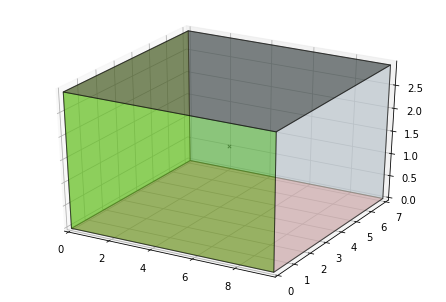

In [ ]:
# Desired reverberation time and dimensions of the room
rt60 = 0.3  # seconds
room_dim = [9.64, 7.04, 2.95]  # meters
fs = sr # the sampling frequency should match that of the room

# We invert Sabine's formula to obtain the parameters for the ISM simulator
e_absorption, max_order = pra.inverse_sabine(rt60, room_dim)

print(e_absorption, max_order)

# Create the room
room = pra.ShoeBox(
    room_dim, fs=sr,  materials=pra.Material(e_absorption), max_order=max_order
)

# place the mics in the room
mic_center = [room_dim[0]/2, room_dim[1]/2, 1.5]
mic_radius = 0.04 / 2
mic_locs = np.matrix([
    [mic_center[0] + mic_radius, mic_center[1], mic_center[2]],  # mic 1
    [mic_center[0], mic_center[1] + mic_radius, mic_center[2]],  # mic 2
    [mic_center[0] - mic_radius, mic_center[1], mic_center[2]],  # mic 3
    [mic_center[0], mic_center[1] - mic_radius, mic_center[2]],  # mic 4
])

mic_locs = mic_locs.T

room.add_microphone_array(mic_locs)

fig, ax = room.plot()
ax.set_xlim([0, room_dim[0]])
ax.set_ylim([0, room_dim[1]])
ax.set_zlim([0, room_dim[2]]);

In [ ]:
def startSimulation(room, audio, sourcePosition, SNR, t60):
  # Remove the previous source
  room.sources.pop()

  # Update room parameters
  e_absorption, max_order = pra.inverse_sabine(t60, room.shoebox_dim)
  room.max_order = max_order

  for wall in room.walls:
    wall.absorption = np.array([e_absorption])

  # place the source in the room
  room.add_source(sourcePosition, signal=audio)

  # Run the simulation (this will also build the RIR automatically)
  if SNR != None:
    room.simulate(snr=SNR)
  else:
    room.sigma2_awgn = None # Reset any noise
    room.simulate()
      
  return np.transpose(room.mic_array.signals)

In [ ]:
# Init simulation
room.add_source([mic_center[0] + 1.5, mic_center[1], 1.5], signal=testAudioMatrix[:, 0])
room.simulate()

In [ ]:
# Dry
ipd.display(ipd.Audio(testAudioMatrix[:, 0], rate=sr))
# Wet
ipd.display(ipd.Audio(room.mic_array.signals[0], rate=sr))

In [ ]:
K30 = 12
res30 = int(360/K30)
K10 = 36
res10 = int(360/K10)
print('Resolutions: {}° and {}°'.format(res30, res10))

DOAs30 = np.arange(-170, 180, res30)
DOAs10 = np.arange(-170, 180 + 1, res10)
print(DOAs30)
print(DOAs10)

Resolutions: 30° and 10°
[-170 -140 -110  -80  -50  -20   10   40   70  100  130  160]
[-170 -160 -150 -140 -130 -120 -110 -100  -90  -80  -70  -60  -50  -40
  -30  -20  -10    0   10   20   30   40   50   60   70   80   90  100
  110  120  130  140  150  160  170  180]


## Train dataset simulation

In [ ]:
# Compute the distance from the ground truth DOA [num] wrt the candidate DOAs [targets]
# Return the class of the corrispondent candidate DOA given by the mapping relative to the resolution [res]
def label(num, targets, res):
  # Adding the positive equivalent of the first angle to take into account the circularity
  circularTargets = np.append(targets, targets[-1] + res) 
  # Adding the negative equivalent of the last angle to take into account the circularity
  circularTargets = np.append(targets[0] - res, circularTargets) 
  # In circularTargets the first and last angles represents the same angles of the last and the first angles of target
  # In circularTargets we have 2 more indexes wrt targets

  for i in range(0, len(circularTargets)):
    distance = np.abs(num - circularTargets[i])
    # If the distance is leq than half of the res, I'm sure that is the smallest distance given the step size [res]
    if (distance <= res / 2):
      # If num is positive and it is closest to the positive equivalent of lowest angle, return the class of lowest
      if (i == len(targets) + 1):
        #print('dist({}, {}) = {} < {} --> class {} '.format(num, circularTargets[i], distance, int(res/2), 0))
        return 0
        # If num is negative and it is closest to the negative equivalent of highest angles, return the class of highest 
      elif (i == -1 + 1):
        return len(targets) - 1
      else:
        #print('dist({}, {}) = {} < {} --> class {} '.format(num, circularTargets[i], distance, int(res/2), i))
        # Index of target differs by 1 wrt roundTarget
        return i - 1

Number of DOAs per one sentence: 20


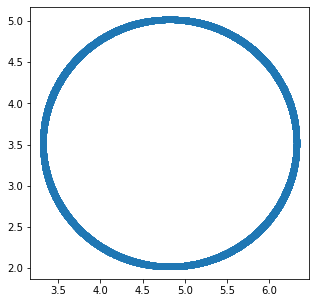

In [ ]:
# Computing random DOAs
np.random.seed(11)
trainCardinality = 6000
numbOfDOAsXsent = int(trainCardinality/sourcesNumTrain)
print('Number of DOAs per one sentence: {}'.format(numbOfDOAsXsent))
randomThetas = np.random.rand(trainCardinality) * 2 * math.pi

radius = 1.5
x = np.zeros([trainCardinality, 1])
y = np.zeros([trainCardinality, 1])
for i in np.arange(0,trainCardinality):
  x[i] = radius * math.cos(randomThetas[i]) + mic_center[0]
  y[i] = radius * math.sin(randomThetas[i]) + mic_center[1]

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.show()

In [ ]:
trainDOAs = randomThetas * 180 / np.pi

for i in range(0, len(trainDOAs)):
  if trainDOAs[i] > 180:
    trainDOAs[i] = trainDOAs[i] - 360

In [ ]:
simulationTrain = np.zeros([int(sr*0.5), 4, trainCardinality])
labelsTrain = np.zeros([trainCardinality, 2])

# For each source
for i in np.arange(0, sourcesNumTrain):
  # For each DOA per sentence
  for j in range(0, numbOfDOAsXsent):
    simulationTrain[:,:,i*numbOfDOAsXsent + j] = startSimulation(room, trainAudioMatrix[:, i], [x[i*numbOfDOAsXsent + j][0], y[i*numbOfDOAsXsent + j][0], 1.5], SNR=None, t60=0.3)[0:8000, :]
    labelsTrain[i*numbOfDOAsXsent + j, 0] = label(trainDOAs[j], DOAs30, res30)
    labelsTrain[i*numbOfDOAsXsent + j, 1] = label(trainDOAs[j], DOAs10, res10)

In [ ]:
# Checking labeling for res 30°
print('DOA mapping with res 30°')
for i in range(0, len(DOAs30)):
  print('{} --> class {}'.format(DOAs30[i], i))

print('\n')

for i in range(0, 10):
  print('{}: {} --> {}  ({}°)'.format(i, trainDOAs[i], int(labelsTrain[i][0]), DOAs30[int(labelsTrain[i][0])]))

DOA mapping with res 30°
-170 --> class 0
-140 --> class 1
-110 --> class 2
-80 --> class 3
-50 --> class 4
-20 --> class 5
10 --> class 6
40 --> class 7
70 --> class 8
100 --> class 9
130 --> class 10
160 --> class 11


0: 64.89708799563691 --> 8  (70°)
1: 7.011086935544849 --> 6  (10°)
2: 166.75866953940405 --> 11  (160°)
3: -99.02378549082681 --> 2  (-110°)
4: 151.27329765158188 --> 11  (160°)
5: 174.75375534040168 --> 11  (160°)
6: 4.601093252619112 --> 6  (10°)
7: 175.45377863515378 --> 0  (-170°)
8: -20.949605156388202 --> 5  (-20°)
9: -53.71376782435965 --> 4  (-50°)


In [ ]:
# Checking labeling for res 10°
print('DOA mapping with res 10°')
for i in range(0, len(DOAs10)):
  print('{} --> class {}'.format(DOAs10[i], i))

print('\n')

for i in range(0, 10):
  print('{}: {} --> {}  ({}°)'.format(i, trainDOAs[i], int(labelsTrain[i][1]), DOAs10[int(labelsTrain[i][1])]))

DOA mapping with res 10°
-170 --> class 0
-160 --> class 1
-150 --> class 2
-140 --> class 3
-130 --> class 4
-120 --> class 5
-110 --> class 6
-100 --> class 7
-90 --> class 8
-80 --> class 9
-70 --> class 10
-60 --> class 11
-50 --> class 12
-40 --> class 13
-30 --> class 14
-20 --> class 15
-10 --> class 16
0 --> class 17
10 --> class 18
20 --> class 19
30 --> class 20
40 --> class 21
50 --> class 22
60 --> class 23
70 --> class 24
80 --> class 25
90 --> class 26
100 --> class 27
110 --> class 28
120 --> class 29
130 --> class 30
140 --> class 31
150 --> class 32
160 --> class 33
170 --> class 34
180 --> class 35


0: 64.89708799563691 --> 23  (60°)
1: 7.011086935544849 --> 18  (10°)
2: 166.75866953940405 --> 34  (170°)
3: -99.02378549082681 --> 7  (-100°)
4: 151.27329765158188 --> 32  (150°)
5: 174.75375534040168 --> 34  (170°)
6: 4.601093252619112 --> 17  (0°)
7: 175.45377863515378 --> 35  (180°)
8: -20.949605156388202 --> 15  (-20°)
9: -53.71376782435965 --> 12  (-50°)


In [ ]:
print('Original')
ipd.display(ipd.Audio(trainAudioMatrix[:,0], rate=sr))
print('Simulated')
ipd.display(ipd.Audio(simulationTrain[:,0,0], rate=sr))

Original


Simulated


In [ ]:
print(trainAudioMatrix.shape)
print(simulationTrain.shape)

(8000, 300)
(8000, 4, 6000)


In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/TRAIN

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/Dataset/TRAIN


In [ ]:
#for i in tqdm(range(0, trainCardinality)):
  #for j in range(0,4):
    # Mapping mic number into letter A,B,C or D
    #micLabel = chr(ord('@')+(j+1))
    #print('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel, i, int(labelsTrain[i,0]), int(labelsTrain[i,1])))
    #sf.write('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel, i, int(labelsTrain[i,0]), int(labelsTrain[i,1])), simulationTrain[:,j,i], sr)  

In [ ]:
# Filename structure: SA{ID}-{MIC}-{SAMPLE NUM}-{CLASS30}-{CLASS10}.wav
# Mics are mapped into letters (0,1,2,3) --> (A,B,C,D)

# E.g.: SA0-A-0-8-23.wav
# --> ID: 0 (from 0 to 23999)
# --> MIC: A (first mic)
# --> SAMPLE NUM: 0 (first sample) (from 0 to 5999)
# --> CLASS RES 30°: 8
# --> CLASS RES 10°: 23

In [ ]:
# Cleaning up space
del labelsTrain
del simulationTrain
gc.collect()

2830

## Validation dataset simulation

Number of DOAs per one sentence: 10


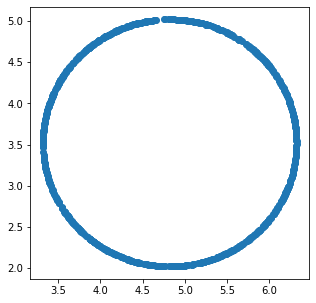

In [ ]:
# Computing random DOAs
np.random.seed(11)
valCardinality = 1000
numbOfDOAsXsent = int(valCardinality/sourcesNumVal)
print('Number of DOAs per one sentence: {}'.format(numbOfDOAsXsent))
randomThetas = np.random.rand(valCardinality) * 2 * math.pi

radius = 1.5
x = np.zeros([valCardinality, 1])
y = np.zeros([valCardinality, 1])
for i in np.arange(0,valCardinality):
  x[i] = radius * math.cos(randomThetas[i]) + mic_center[0]
  y[i] = radius * math.sin(randomThetas[i]) + mic_center[1]

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.show()

valDOAs = randomThetas * 180 / np.pi

for i in range(0, len(valDOAs)):
  if valDOAs[i] > 180:
    valDOAs[i] = valDOAs[i] - 360

simulationVal = np.zeros([int(sr*0.5), 4, valCardinality])
labelsVal = np.zeros([valCardinality, 2])

# For each source
for i in np.arange(0, sourcesNumVal):
  # For each DOA per sentence
  for j in range(0, numbOfDOAsXsent):
    simulationVal[:,:,i*numbOfDOAsXsent + j] = startSimulation(room, valAudioMatrix[:, i], [x[i*numbOfDOAsXsent + j][0], y[i*numbOfDOAsXsent + j][0], 1.5], SNR=None, t60=0.3)[0:8000, :]
    labelsVal[i*numbOfDOAsXsent + j, 0] = label(valDOAs[j], DOAs30, res30)
    labelsVal[i*numbOfDOAsXsent + j, 1] = label(valDOAs[j], DOAs10, res10)    

In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/VALIDATION

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/Dataset/VALIDATION


In [ ]:
print(valAudioMatrix.shape)
print(simulationVal.shape)

(8000, 100)
(8000, 4, 1000)


In [ ]:
#for i in tqdm(range(0, valCardinality)):
  #for j in range(0,4):
    #micLabel = chr(ord('@')+(j+1))
    #sf.write('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsVal[i,0]), int(labelsVal[i,1])), simulationVal[:,j,i], sr)  

100%|██████████| 1000/1000 [00:43<00:00, 22.79it/s]


In [ ]:
# Cleaning up space
del labelsVal
del simulationVal
gc.collect()

3010

## Test dataset simulation

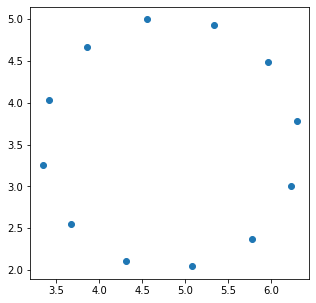

In [ ]:
# Testing for resolution 30°, 10 sentences for each sound source location
x = np.zeros([len(DOAs30), 1])
y = np.zeros([len(DOAs30), 1])
sourcesNumTest = 10;
labelsTestRes30 = np.zeros([len(DOAs30) * sourcesNumTest, 1])

for i in range(0, len(DOAs30)):
  doa_rad = DOAs30[i] * np.pi / 180
  x[i] = math.cos(doa_rad) * radius + mic_center[0]
  y[i] = math.sin(doa_rad) * radius + mic_center[1]
  labelsTestRes30[i * sourcesNumTest: i * sourcesNumTest + sourcesNumTest] = i

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.show()

In [ ]:
np.random.seed(50)
totalTestCardinality = sourcesNumTest * len(DOAs30)
indexes = np.random.randint(0, len(listOfTestWavs), size=totalTestCardinality)
testAudioMatrix, sr = getAudioMatrix([listOfTestWavs[i] for i in indexes], sample_duration, totalTestCardinality)

In [ ]:
simulationTest30 = np.zeros([int(sr*0.5), 4, totalTestCardinality])

# For each source
for i in np.arange(0, len(DOAs30)):
  # For each DOA per sentence
  for j in range(0, sourcesNumTest):
    simulationTest30[:,:,i*sourcesNumTest + j] = startSimulation(room, testAudioMatrix[:, i*sourcesNumTest + j], [x[i][0], y[i][0], 1.5], SNR=None, t60=0.3)[0:8000, :]    

In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/TEST/RES30

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/Dataset/TEST/RES30


In [ ]:
#for i in tqdm(range(0, totalTestCardinality)):
  #for j in range(0,4):
    #micLabel = chr(ord('@')+(j+1))
    #print('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsTestRes30[i]), int(labelsTestRes30[i])))
    #sf.write('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsTestRes30[i]), int(labelsTestRes30[i])), simulationTest30[:,j,i], sr)  

100%|██████████| 120/120 [00:04<00:00, 27.43it/s]


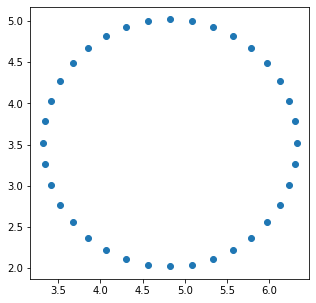

In [ ]:
# Testing for resolution 10°, 10 sentences for each sound source location
x = np.zeros([len(DOAs10), 1])
y = np.zeros([len(DOAs10), 1])
sourcesNumTest = 10;
labelsTestRes10 = np.zeros([len(DOAs10) * sourcesNumTest, 1])

for i in range(0, len(DOAs10)):
  doa_rad = DOAs10[i] * np.pi / 180
  x[i] = math.cos(doa_rad) * radius + mic_center[0]
  y[i] = math.sin(doa_rad) * radius + mic_center[1]
  labelsTestRes10[i * sourcesNumTest: i * sourcesNumTest + sourcesNumTest] = i

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.show()

In [ ]:
np.random.seed(51)
totalTestCardinality = sourcesNumTest * len(DOAs10)
indexes = np.random.randint(0, len(listOfTestWavs), size=totalTestCardinality)
testAudioMatrix, sr = getAudioMatrix([listOfTestWavs[i] for i in indexes], sample_duration, totalTestCardinality)

In [ ]:
simulationTest10 = np.zeros([int(sr*0.5), 4, totalTestCardinality])

# For each source
for i in np.arange(0, len(DOAs10)):
  # For each DOA per sentence
  for j in range(0, sourcesNumTest):
    simulationTest10[:,:,i*sourcesNumTest + j] = startSimulation(room, testAudioMatrix[:, i*sourcesNumTest + j], [x[i][0], y[i][0], 1.5], SNR=None, t60=0.3)[0:8000, :]    

In [ ]:
print(totalTestCardinality)
print(len(DOAs10))
print(testAudioMatrix.shape)
print(simulationTest10.shape)
print(x.shape)
print(labelsTestRes10.shape)

360
36
(8000, 360)
(8000, 4, 360)
(36, 1)
(360, 1)


In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/TEST/RES10

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/Dataset/TEST/RES10


In [ ]:
#for i in tqdm(range(0, totalTestCardinality)):
  #for j in range(0,4):
    #micLabel = chr(ord('@')+(j+1))
    #print('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsTestRes10[i]), int(labelsTestRes10[i])))
    #sf.write('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsTestRes10[i]), int(labelsTestRes10[i])), simulationTest10[:,j,i], sr)  

100%|██████████| 360/360 [00:14<00:00, 25.02it/s]


## SNR Test

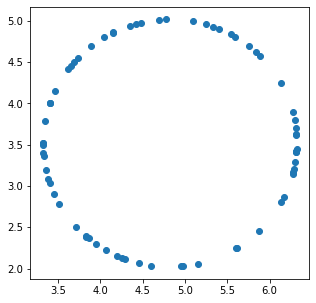

In [ ]:
# Computing random DOAs for increasing SNR simulation
np.random.seed(60)
steps = 7
sentencesPerStep = 10
totalTestNumSNR = sentencesPerStep*steps
randomThetas = np.random.rand(totalTestNumSNR) * 2 * math.pi

x = np.zeros([totalTestNumSNR, 1])
y = np.zeros([totalTestNumSNR, 1])
for i in np.arange(0,totalTestNumSNR):
  x[i] = radius * math.cos(randomThetas[i]) + mic_center[0]
  y[i] = radius * math.sin(randomThetas[i]) + mic_center[1]

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.show()

In [ ]:
testDOASNR = randomThetas * 180 / np.pi

for i in range(0, len(testDOASNR)):
  if testDOASNR[i] > 180:
    testDOASNR[i] = testDOASNR[i] - 360

In [ ]:
np.random.seed(61)
indexes = np.random.randint(0, len(listOfTestWavs), size=totalTestNumSNR)
snrAudioMatrix, sr = getAudioMatrix([listOfTestWavs[i] for i in indexes], sample_duration, totalTestNumSNR)

In [ ]:
testSNRs = np.arange(0, 30 + 1, 5 ) # in dB

In [ ]:
simulationTestSNR = np.zeros([int(sr*0.5), 4, totalTestNumSNR])
labelsSNR = np.zeros([totalTestNumSNR, 2])

# For each source
for i in np.arange(0, steps):
  # For each DOA per sentence
  for j in range(0, sentencesPerStep):
    simulationTestSNR[:,:,i*sentencesPerStep + j] = startSimulation(room, snrAudioMatrix[:, i*sentencesPerStep + j], [x[i*sentencesPerStep + j][0], y[i*sentencesPerStep + j][0], 1.5], SNR=testSNRs[i], t60=0.3)[0:8000, :]
    labelsSNR[i*sentencesPerStep + j, 0] = label(testDOASNR[j], DOAs30, res30)
    labelsSNR[i*sentencesPerStep + j, 1] = label(testDOASNR[j], DOAs10, res10)   

In [ ]:
ipd.display(ipd.Audio(simulationTestSNR[:,0,0], rate=sr))
ipd.display(ipd.Audio(simulationTestSNR[:,0,30], rate=sr))
ipd.display(ipd.Audio(simulationTestSNR[:,0,69], rate=sr))

In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/CUSTOM_TESTS/SNR

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/Dataset/CUSTOM_TESTS/SNR


In [ ]:
#for i in tqdm(range(0, totalTestNumSNR)):
  #for j in range(0,4):
    #micLabel = chr(ord('@')+(j+1))
    #print('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsSNR[i,0]), int(labelsSNR[i,1])))
    #sf.write('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsSNR[i,0]), int(labelsSNR[i,1])), simulationTestSNR[:,j,i], sr)  

100%|██████████| 70/70 [00:03<00:00, 22.08it/s]


## T60 Test

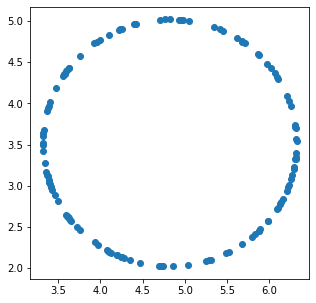

In [ ]:
# Computing random DOAs for incresing T60 simulation
np.random.seed(63)
steps = 13
sentencesPerStep = 10
totalTrainNumT60 = sentencesPerStep*steps
randomThetas = np.random.rand(totalTrainNumT60) * 2 * math.pi

x = np.zeros([totalTrainNumT60, 1])
y = np.zeros([totalTrainNumT60, 1])
for i in np.arange(0,totalTrainNumT60):
  x[i] = radius * math.cos(randomThetas[i]) + mic_center[0]
  y[i] = radius * math.sin(randomThetas[i]) + mic_center[1]

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.show()

In [ ]:
trainDOAT60 = randomThetas * 180 / np.pi

for i in range(0, len(trainDOAT60)):
  if trainDOAT60[i] > 180:
    trainDOAT60[i] = trainDOAT60[i] - 360

In [ ]:
np.random.seed(65)
indexes = np.random.randint(0, len(listOfTestWavs), size=totalTrainNumT60)
t60AudioMatrix, sr = getAudioMatrix([listOfTestWavs[i] for i in indexes], sample_duration, totalTrainNumT60)

In [ ]:
testT60s = np.arange(0.2, 0.8 + 0.01, 0.05) #in ms
testT60s

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 ])

In [ ]:
simulationTestT60 = np.zeros([int(sr*0.5), 4, totalTrainNumT60])
labelsT60 = np.zeros([totalTrainNumT60, 2])

# For each source
for i in range(0, steps):
  # For each DOA per sentence
  for j in range(0, sentencesPerStep):
    simulationTestT60[:,:,i*sentencesPerStep + j] = startSimulation(room, t60AudioMatrix[:, i*sentencesPerStep + j], [x[i*sentencesPerStep + j][0], y[i*sentencesPerStep + j][0], 1.5], SNR=None, t60=testT60s[i])[0:8000, :]
    labelsT60[i*sentencesPerStep + j, 0] = label(trainDOAT60[j], DOAs30, res30)
    labelsT60[i*sentencesPerStep + j, 1] = label(trainDOAT60[j], DOAs10, res10) 

In [ ]:
print(t60AudioMatrix.shape)
print(simulationTestT60.shape)
print(labelsT60.shape)
print('{} --> res 30: {}, res 10: {}'.format(trainDOAT60[0], int(labelsT60[0][0]), int(labelsT60[0][1])))

(8000, 130)
(8000, 4, 130)
(130, 2)
-160.58123189978886 --> res 30: 0, res 10: 1


In [ ]:
ipd.display(ipd.Audio(simulationTestT60[:,0,0], rate=sr))
ipd.display(ipd.Audio(simulationTestT60[:,0,60], rate=sr))
ipd.display(ipd.Audio(simulationTestT60[:,0,129], rate=sr))

In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/CUSTOM_TESTS/T60

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/Dataset/CUSTOM_TESTS/T60


In [ ]:
for i in tqdm(range(0, totalTrainNumT60)):
  for j in range(0,4):
    micLabel = chr(ord('@')+(j+1))
    #print('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsT60[i,0]), int(labelsT60[i,1])))
    sf.write('SA{}-{}-{}-{}-{}.wav'.format(i*4 + j, micLabel , i, int(labelsT60[i,0]), int(labelsT60[i,1])), simulationTestT60[:,j,i], sr)  

100%|██████████| 130/130 [00:05<00:00, 24.10it/s]


## Integrity checks

In [ ]:
print(dir(room))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_init_room_engine', '_set_ray_tracing_options', '_update_room_engine_params', '_var_init', '_wall_mapping', 'add', 'add_microphone', 'add_microphone_array', 'add_soundsource', 'add_source', 'air_absorption', 'c', 'compute_rir', 'dim', 'direct_snr', 'extrude', 'from_corners', 'fs', 'get_bbox', 'get_volume', 'get_wall_by_name', 'image_source_model', 'is_inside', 'is_multi_band', 'max_order', 'measure_rt60', 'mic_array', 'n_mics', 'n_sources', 'octave_bands', 'physics', 'plot', 'plot_rir', 'ray_tracing', 'rir', 'room_engine', 'rt60_theory', 'rt_args', 'set_air_absorption', 'set_ray_tracing', 'set_sound_speed', 'shoebox_dim', 'sigma2_awgn', 'simulate

In [ ]:
print(room.sigma2_awgn)

None


In [ ]:
print(snrSimulationTrain.shape)
print(t60SimulationTrain.shape)
print(snrSimulationTest.shape)
print(t60SimulationTest.shape)

print(trainDOASNR.shape)
print(trainDOAT60.shape)

NameError: ignored

In [ ]:
simulationTrain = np.append(snrSimulationTrain, t60SimulationTrain, axis=2)
# Free space
del snrSimulationTrain
del t60SimulationTrain
gc.collect()

trainDOA = np.append(trainDOASNR, trainDOAT60)
# Free space
del trainDOASNR
del trainDOAT60
gc.collect()

print(simulationTrain.shape)
print(trainDOA.shape)

(24790, 4, 600)
(600,)


In [ ]:
simulationTest = np.append(snrSimulationTest, t60SimulationTest, axis=2)
# Free space
del snrSimulationTest
del t60SimulationTest
gc.collect()

testDOA = np.append(testDOASNR, testDOAT60)
# Free space
del testDOASNR
del testDOAT60
gc.collect()

print(simulationTest.shape)
print(testDOA.shape)

(24790, 4, 200)
(200,)


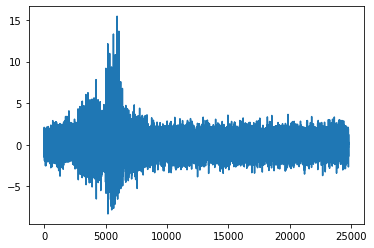

In [ ]:
plt.plot(simulationTest[:, 0, 0])

In [ ]:
ipd.Audio(simulationTest[:, 0, 0], rate=sr)

In [ ]:
label(-179, DOAs10, res10)

35

In [ ]:
print('Mapping res 30°:')
for i in range(0, len(DOAs30)):
  print('class {} --> DOA {}°'.format(i, DOAs30[i]))

Mapping res 30°:
class 0 --> DOA -170°
class 1 --> DOA -140°
class 2 --> DOA -110°
class 3 --> DOA -80°
class 4 --> DOA -50°
class 5 --> DOA -20°
class 6 --> DOA 10°
class 7 --> DOA 40°
class 8 --> DOA 70°
class 9 --> DOA 100°
class 10 --> DOA 130°
class 11 --> DOA 160°


In [ ]:
# Testing mapping res 30°
for i in range(-180, 180 + 2, 10):
  print('class {:3} --> {}°'.format(label(i, DOAs30, res30), i))
  #distance(i, DOAs30, res30)

class   0 --> -180°
class   0 --> -170°
class   0 --> -160°
class   1 --> -150°
class   1 --> -140°
class   1 --> -130°
class   2 --> -120°
class   2 --> -110°
class   2 --> -100°
class   3 --> -90°
class   3 --> -80°
class   3 --> -70°
class   4 --> -60°
class   4 --> -50°
class   4 --> -40°
class   5 --> -30°
class   5 --> -20°
class   5 --> -10°
class   6 --> 0°
class   6 --> 10°
class   6 --> 20°
class   7 --> 30°
class   7 --> 40°
class   7 --> 50°
class   8 --> 60°
class   8 --> 70°
class   8 --> 80°
class   9 --> 90°
class   9 --> 100°
class   9 --> 110°
class  10 --> 120°
class  10 --> 130°
class  10 --> 140°
class  11 --> 150°
class  11 --> 160°
class  11 --> 170°
class   0 --> 180°


In [ ]:
print('Mapping res 10°:')
for i in range(0, len(DOAs10)):
  print('class {} --> DOA {}°'.format(i, DOAs10[i]))

Mapping res 10°:
class 0 --> DOA -170°
class 1 --> DOA -160°
class 2 --> DOA -150°
class 3 --> DOA -140°
class 4 --> DOA -130°
class 5 --> DOA -120°
class 6 --> DOA -110°
class 7 --> DOA -100°
class 8 --> DOA -90°
class 9 --> DOA -80°
class 10 --> DOA -70°
class 11 --> DOA -60°
class 12 --> DOA -50°
class 13 --> DOA -40°
class 14 --> DOA -30°
class 15 --> DOA -20°
class 16 --> DOA -10°
class 17 --> DOA 0°
class 18 --> DOA 10°
class 19 --> DOA 20°
class 20 --> DOA 30°
class 21 --> DOA 40°
class 22 --> DOA 50°
class 23 --> DOA 60°
class 24 --> DOA 70°
class 25 --> DOA 80°
class 26 --> DOA 90°
class 27 --> DOA 100°
class 28 --> DOA 110°
class 29 --> DOA 120°
class 30 --> DOA 130°
class 31 --> DOA 140°
class 32 --> DOA 150°
class 33 --> DOA 160°
class 34 --> DOA 170°
class 35 --> DOA 180°


In [ ]:
# Testing mapping res 30°
for i in range(-180, 190 + 2, 10):
  print('class {} --> {}°'.format(label(i, DOAs10, res10), i))
  #distance(i, DOAs10, res10)

class 35 --> -180°
class 0 --> -170°
class 1 --> -160°
class 2 --> -150°
class 3 --> -140°
class 4 --> -130°
class 5 --> -120°
class 6 --> -110°
class 7 --> -100°
class 8 --> -90°
class 9 --> -80°
class 10 --> -70°
class 11 --> -60°
class 12 --> -50°
class 13 --> -40°
class 14 --> -30°
class 15 --> -20°
class 16 --> -10°
class 17 --> 0°
class 18 --> 10°
class 19 --> 20°
class 20 --> 30°
class 21 --> 40°
class 22 --> 50°
class 23 --> 60°
class 24 --> 70°
class 25 --> 80°
class 26 --> 90°
class 27 --> 100°
class 28 --> 110°
class 29 --> 120°
class 30 --> 130°
class 31 --> 140°
class 32 --> 150°
class 33 --> 160°
class 34 --> 170°
class 35 --> 180°
class 0 --> 190°


In [ ]:
# Train labels
labelsTrainRes30 = np.zeros(trainDOA.shape)
labelsTrainRes10 = np.zeros(trainDOA.shape)
for i in range(0, len(trainDOA)):
  labelsTrainRes30[i] = label(trainDOA[i], DOAs30, res30)
  labelsTrainRes10[i] = label(trainDOA[i], DOAs10, res10)

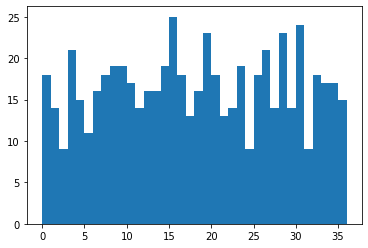

In [ ]:
plt.hist(labelsTrainRes10, bins=range(0, K10 + 1));

In [ ]:
# Test labels
labelsTestRes30 = np.zeros(testDOA.shape)
labelsTestRes10 = np.zeros(testDOA.shape)
for i in range(0, len(testDOA)):
  labelsTestRes30[i] = label(testDOA[i], DOAs30, res30)
  labelsTestRes10[i] = label(testDOA[i], DOAs10, res10)

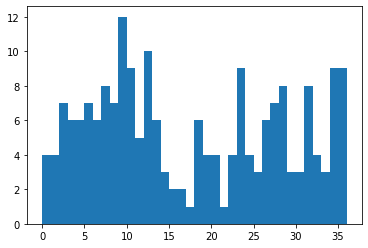

In [ ]:
plt.hist(labelsTestRes10, bins=range(0, K10 + 1));

In [ ]:
# Write out audio
#sf.write('test.wav', simulationTrain[:,0,599], sr)

In [ ]:
labelsTrainRes30 = np.zeros(trainDOAs.shape)
labelsTrainRes10 = np.zeros(trainDOAs.shape)
for i in range(0, len(trainDOAs)):
  labelsTestRes30[i] = label(trainDOAs[i], DOAs30, res30)
  labelsTestRes10[i] = label(trainDOAs[i], DOAs10, res10)

print(labelsTestRes10.shape)

(200,)
